$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 2 $$

# `01` Assignment 04
- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

**Notes:**
- Split the data into train and test (test size: 20%) split and use validation during training.
- Evaluate the model on training and test sets.
- Plot the loss, and accuracy against epochs.



Sample Plot:


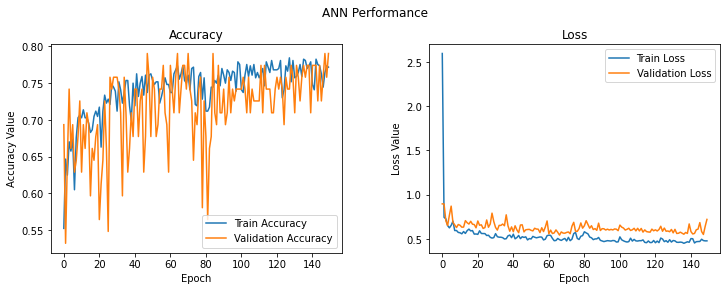

## `0` Import Libraries & Load Dataset

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
np.random.seed = 42

import matplotlib.pyplot as plt
from tensorflow.keras.utils import set_random_seed



In [14]:
tf.random.set_seed(1234)

In [15]:
dataset =pd.read_csv("diabetes.csv")
dataset.shape

(768, 9)

In [16]:
dataset.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [17]:
X =dataset.drop(columns=['Outcome'])
y =dataset['Outcome']

In [7]:
X.shape

(768, 8)

In [18]:
y.shape

(768,)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## `i` Shallow network


In [49]:
model=Sequential()
model.add(Dense(5,activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 45        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy', 'Precision'])

In [51]:
train_callback = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.15)

Epoch 1/150
17/17 [==============================] - 1s 16ms/step - loss: 9.4483 - accuracy: 0.5336 - precision: 0.3493 - val_loss: 4.9420 - val_accuracy: 0.3871 - val_precision: 0.2593
Epoch 2/150
17/17 [==============================] - 0s 4ms/step - loss: 3.2113 - accuracy: 0.5202 - precision: 0.3529 - val_loss: 1.7939 - val_accuracy: 0.5914 - val_precision: 0.2941
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 1.4305 - accuracy: 0.5393 - precision: 0.2973 - val_loss: 1.3971 - val_accuracy: 0.6452 - val_precision: 0.3750
Epoch 4/150
17/17 [==============================] - 0s 4ms/step - loss: 0.9508 - accuracy: 0.6008 - precision: 0.3654 - val_loss: 0.8461 - val_accuracy: 0.6237 - val_precision: 0.3571
Epoch 5/150
17/17 [==============================] - 0s 4ms/step - loss: 0.7385 - accuracy: 0.6392 - precision: 0.4474 - val_loss: 0.6899 - val_accuracy: 0.6559 - val_precision: 0.4737
Epoch 6/150
17/17 [==============================] - 0s 3ms/step - loss: 0

In [52]:
model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.6824 - precision: 0.8333


[0.6193857192993164, 0.6824104189872742, 0.8333333134651184]

In [53]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.6299 - precision: 0.5000


[0.6495874524116516, 0.6298701167106628, 0.5]

In [24]:
train_callback.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

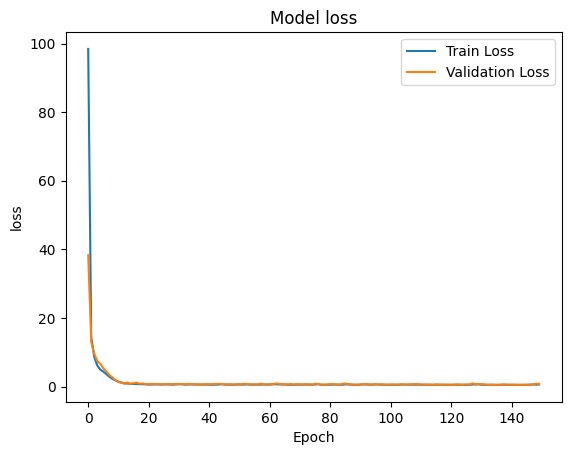

In [32]:
plt.plot(train_callback.history['loss'], label='Train Loss')
plt.plot(train_callback.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

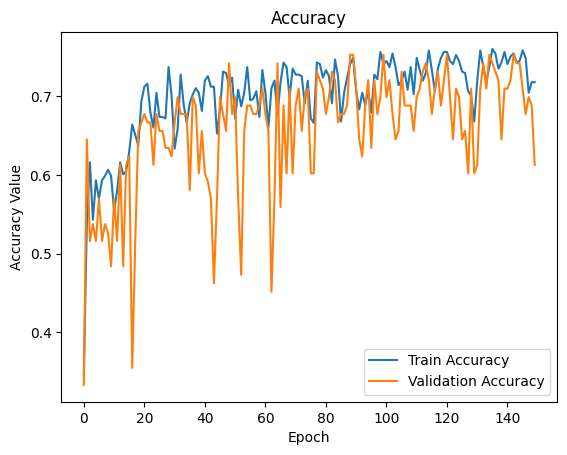

In [33]:
plt.plot(train_callback.history['accuracy'],label='Train Accuracy')
plt.plot(train_callback.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

## `ii` Deep network


In [34]:
deeper_model = keras.Sequential()
deeper_model.add(Dense(12,activation='relu',input_shape=(X.shape[1],)))
deeper_model.add(Dense(8,activation='relu'))
deeper_model.add(Dense(1,activation='sigmoid'))

In [35]:
deeper_model.compile(keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy', 'Precision'])

In [36]:
deeper_callback =deeper_model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.15)

Epoch 1/150
17/17 [==============================] - 1s 17ms/step - loss: 7.9193 - accuracy: 0.5662 - precision: 0.3894 - val_loss: 2.1016 - val_accuracy: 0.5591 - val_precision: 0.3333
Epoch 2/150
17/17 [==============================] - 0s 4ms/step - loss: 1.5673 - accuracy: 0.6372 - precision: 0.4809 - val_loss: 0.9871 - val_accuracy: 0.6559 - val_precision: 0.4737
Epoch 3/150
17/17 [==============================] - 0s 3ms/step - loss: 1.0065 - accuracy: 0.6104 - precision: 0.4428 - val_loss: 0.7854 - val_accuracy: 0.6022 - val_precision: 0.4444
Epoch 4/150
17/17 [==============================] - 0s 4ms/step - loss: 0.7989 - accuracy: 0.6583 - precision: 0.5069 - val_loss: 0.8443 - val_accuracy: 0.5591 - val_precision: 0.4138
Epoch 5/150
17/17 [==============================] - 0s 3ms/step - loss: 0.7091 - accuracy: 0.6411 - precision: 0.4783 - val_loss: 0.6657 - val_accuracy: 0.6452 - val_precision: 0.4750
Epoch 6/150
17/17 [==============================] - 0s 4ms/step - loss: 0

In [47]:
deeper_model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7671 - precision: 0.7099


[0.4842298626899719, 0.767100989818573, 0.709876537322998]

In [37]:
deeper_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5492 - accuracy: 0.7662 - precision: 0.7561


[0.5491762757301331, 0.7662337422370911, 0.7560975551605225]

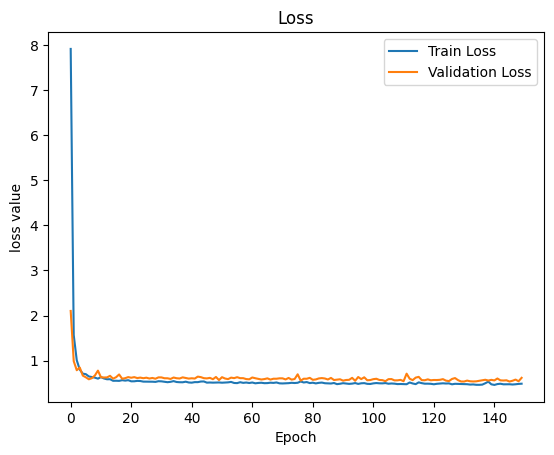

In [38]:
plt.plot(deeper_callback.history['loss'], label='Train Loss')
plt.plot(deeper_callback.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss value')
plt.legend()
plt.show()

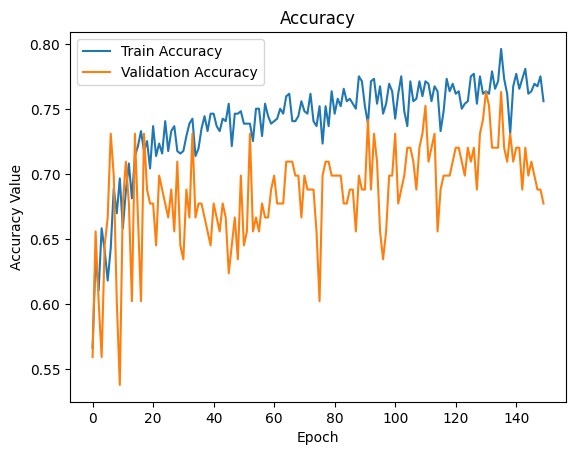

In [39]:
plt.plot(deeper_callback.history['accuracy'],label='Train Accuracy')
plt.plot(deeper_callback.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

## `iii` Deeper network


In [40]:
more_deeper_model = keras.Sequential()
more_deeper_model.add(Dense(32,activation='relu',input_shape=(X.shape[1],)))
more_deeper_model.add(Dense(16,activation='relu'))
more_deeper_model.add(Dense(8,activation='relu'))
more_deeper_model.add(Dense(1,activation='sigmoid'))

In [41]:
more_deeper_model.compile(keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy', 'Precision'])

In [42]:
more_deeper_callback =more_deeper_model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.15)

Epoch 1/150
17/17 [==============================] - 1s 18ms/step - loss: 3.3755 - accuracy: 0.5739 - precision: 0.3220 - val_loss: 0.6770 - val_accuracy: 0.6452 - val_precision: 0.0000e+00
Epoch 2/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.6603 - precision: 0.7143 - val_loss: 0.7177 - val_accuracy: 0.6559 - val_precision: 0.3333
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.6526 - precision: 0.4000 - val_loss: 0.6765 - val_accuracy: 0.6667 - val_precision: 0.0000e+00
Epoch 4/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.6545 - precision: 0.0000e+00 - val_loss: 0.6706 - val_accuracy: 0.6667 - val_precision: 0.0000e+00
Epoch 5/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6304 - accuracy: 0.6545 - precision: 0.0000e+00 - val_loss: 0.6817 - val_accuracy: 0.6667 - val_precision: 0.0000e+00
Epoch 6/150
17/17 [==============================]

In [46]:
more_deeper_model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6564 - precision: 0.0000e+00


[0.6281644105911255, 0.6563518047332764, 0.0]

In [43]:
more_deeper_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.6299 - precision: 0.0000e+00


[0.6437490582466125, 0.6298701167106628, 0.0]

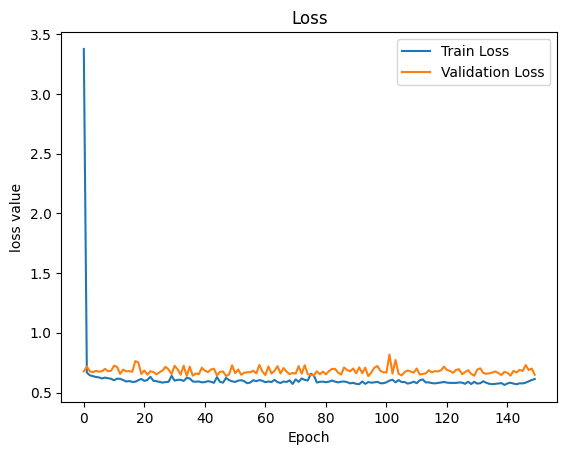

In [44]:
plt.plot(more_deeper_callback.history['loss'], label='Train Loss')
plt.plot(more_deeper_callback.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss value')
plt.legend()
plt.show()

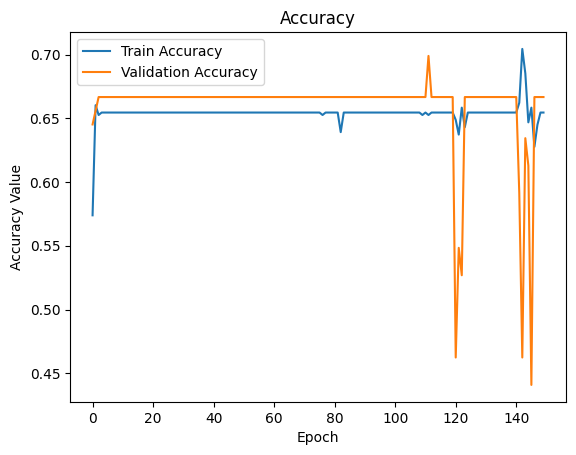

In [45]:
plt.plot(more_deeper_callback.history['accuracy'],label='Train Accuracy')
plt.plot(more_deeper_callback.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$